### Markowitz Portfolio Optimization
**Authors: R. Sahakyan |
Instructor: H. Davtyan |
Institution: American University of Armenia |
Spring 2018**

#### Case Background

Modern Portfolio Theory (MPT) is an investment theory developed by Harry Markowitz and published under the title "Portfolio Selection" in the Journal of Finance in 1952. In the world of finance higher risk is associated with greater probability of higher return and lower risk with a greater probability of smaller return. MPT assumes that investors are risk-averse, meaning that given two portfolios that offer the same expected return, investors will prefer the less risky one. Thus, an investor will take on increased risk only if compensated by higher expected returns.

Another factor comes in to play in MPT is "diversification". Modern portfolio theory says that it is not enough to look at the expected risk and return of one particular stock. By investing in more than one stock, an investor can reap the benefits of diversification – chief among them, a reduction in the riskiness of the portfolio. 

In particular stocks are subject to two types of risks: specific and market risks. Specific(also called unique) risk is a risk that affects a minimal number of assets. Specific risk, as its name implies, relates to risks that are very specific to a company or small group of companies, e.g. a sudden strike by the employees of a company or a new governmental regulation affecting a particular group of companies. This type of risk is the opposite of overall market risk or systematic risk.  Systematic risk is the risk inherent to the entire market or market segment. 

According to MPT, diversification helps to reduce specific risk. Even going further, with the right combination of financial instruments in the portfolio an investor can achieve complete elimination of specific risks and only bear market risk. What one needs to understand is "risk of a portfolio is not equal to average/weighted-average of individual stocks in the portfolio". In terms of return, yes it is the average/weighted average of individual stock's returns, but that's not the case for risk. The risk is about how volatile the asset is, if one has more than one stock in portfolio, then  investor has to take count of how these stocks movement correlates with each other. The beauty of diversification is that even getting lower risk than a stock with the lowest risk in portfolio, by optimising the allocation.

#### Business Problem & Project Scope

The problem of the project is to identify what are the weights of the provided individual assets in the risk averse portfolio. Additionally, what is the composition of the most optimal portfolio as per Sharpe ratio with the given stocks. By simulating portfolio returns the project aims to identify the risk-averse and maximum Sharpe portfolios.

#### Project Steps & Methodology

**1)** The project uses Quandl WIKI Prices dataset to get adjusted closed prices for six individual listed stocks for the period of 2014-1-1 to 2014-12-31. 

**2)** To calculate the Portfolio return and risk(standard deviation) the following formulae are applied. 

Portfolio theory’s efficacy can be seen by examining the underlying statistical thoughts behind the concept. For a single asset, the expected mean-variance of returns ‘r’ over ‘n’ observations is given by the standard formulae below.

*$Mean(Returns) = \frac{1}{n}\sum_{i=1}^n r_i$*

*$Var = \sum_{i=1}^n (r_i-\mu)$*

Expanding this to the mean-variance of a portfolio of assets that are potentially correlated to one another, we have the weighted average of the mean returns, and the sum of the terms in the covariance matrix for the assets:

*$Mean (Portfolio Returns) = \sum_{i=1}^n w_i r_i$*

*$\sigma_{port}(Portfolio Variance) = \sum_{i=1}^n \sum_{j=1}^n w_i w_j \rho_{i,j} \sigma_i \sigma_j$*

Within the scope of this project the Sharpe ratio is applied to identify the most optimal portfolio. The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Subtracting the risk-free rate from the mean return, the performance associated with risk-taking activities can be isolated. Because it uses standard deviation, the Sharpe ratio can be used to compare risk-adjusted returns across all fund categories.

*$Sharpe Ratio = \left(\frac{r_{port} - r_{riskfree}}{\sigma_{port}}\right)$*

**3)** By calculating the percentage changes of the price, daily returns of the stocks are derived. Notably, only the gain in price change is considered as a return within the scope of this project(Dividends and other cash inflows are neglected). Mean of Daily returns is multiplied by 252 to get the mean annual return for 252 stock-market working days. By calculating the daily and annual covariance of stocks we are ready to simulate the portfolios to get Portfolio Return, Variance, Sharpe Ratio and corresponding weights of individual assets.

**4)** Simulations on 200000 portfolios are applied to calculate portfolio return, volatility and Sharpe ratio. After the simulations the portfolio with the highest Sharpe ratio is chosen as the most optimal one and the portfolio with the lowest volatility is chosen for the risk-averse investor(investor that is willing to accept only the minimal risk). Therafter, the efficient frontier of returns of the most profitable portfolios for any level of risk will be plotted.

**5)** Individual Stock performance in terms of volatility and returns will be compared to the optimal portfolio performance to draw conclusions on the usefulness of the theory.

**6)** Overall, the project will become an interactive tool for investors. They can change the financial instruments in the portfolio, timeframe of observations, the number of simulations, risk free rates and etc. At the end this tool will provide them the optimal portfolio as per Sharpe Ratio and the risk-averse portfolio.

In [131]:
# importing necessary libraries
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d #To achieve smooth line for the frontier

plt.style.use("fivethirtyeight") #this style make more definite lines for graphs
np.random.seed(123) #to achieve reproductivity of the project
%matplotlib inline 

The stocks selected for this project are Estee Lauder Group-EL, Macy's-M, Mondelez Group-MDLZ, Express Scripts Holding-ESRX, American Express Company-AXP, Goldman Sachs-GS. The code block below will get daily adjusted closing prices of each stock from Quandl WIKI dataset for 01/01/2014 to 31/12/2014 time period.

In [132]:
quandl.ApiConfig.api_key = 'Insert Your API Here' 
selected = ['EL', 'M', 'MDLZ', 'ESRX', 'AXP', 'GS']
data = quandl.get_table('WIKI/PRICES', ticker = selected,qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2014-12-31' }, paginate=True)
data.head(3)

,date,ticker,adj_close
None,,,
0,2014-01-02,AXP,84.276930
1,2014-01-03,AXP,84.550159
2,2014-01-06,AXP,84.512472


In [133]:
#reorganising column tickers and assigning date column
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table.columns = [col[1] for col in table.columns]
print(table.head(3))
print("\n")
print("-"*80)
print("\n")
print('\033[1m'+'Table Info'+"\033[0;0m")
#no null values; values correspond to 252 stock-market working days
print(table.info())

                  AXP         EL    ESRX          GS          M       MDLZ
date                                                                      
2014-01-02  84.276930  70.214583  69.955  168.112371  46.788376  32.692750
2014-01-03  84.550159  70.157429  70.000  169.309847  46.919829  32.636400
2014-01-06  84.512472  70.567037  69.880  170.469309  46.578052  32.429781


--------------------------------------------------------------------------------


Table Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-01-02 to 2014-12-31
Data columns (total 6 columns):
AXP     252 non-null float64
EL      252 non-null float64
ESRX    252 non-null float64
GS      252 non-null float64
M       252 non-null float64
MDLZ    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB
None


Text(0.5,1,'Stock Price Graphs')

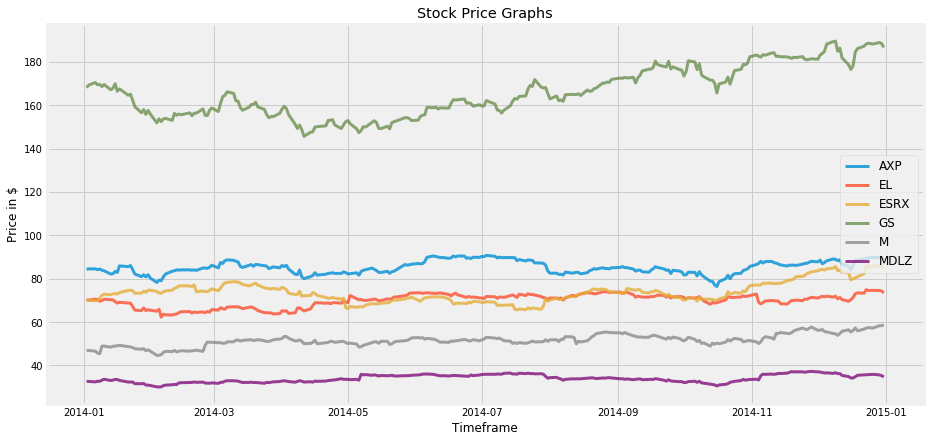

In [134]:
#Plotting price movements within the specified timeframe
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='center right', fontsize=12)
plt.ylabel('Price in $')
plt.xlabel('Timeframe')
plt.title("Stock Price Graphs")

In [135]:
returns_daily = table.pct_change() #The percentage change implies the daily return 
returns_daily.dropna(inplace=True) #dropping null values from the first row
returns_annual = returns_daily.mean() * 252 #252 is the number of trading days per annum
returns_annual.head() #Mean returns for each stock

AXP     0.066157
EL      0.059212
ESRX    0.208959
GS      0.120301
M       0.254819
dtype: float64

Yet, Price Variations solely do not provide useful information. Daily Return Variations over one year period can become an essential tool in the project.

Text(0.5,1,'Stock Returns')

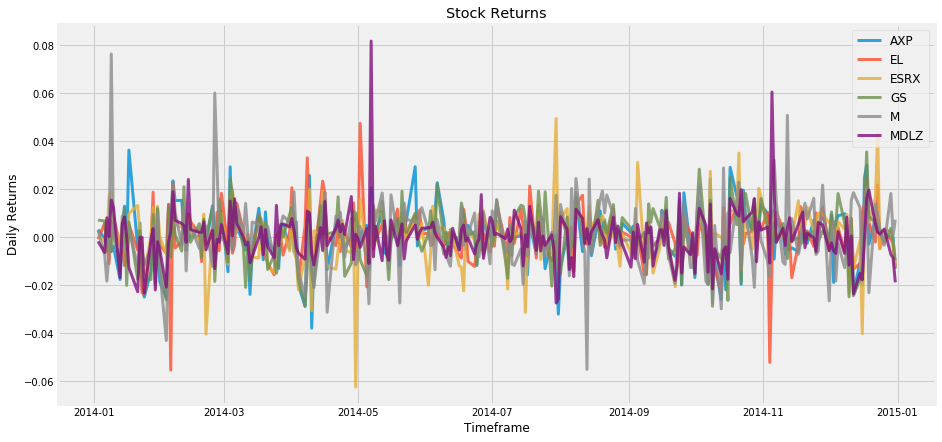

In [136]:
plt.figure(figsize=(14, 7))
for c in returns_daily.columns.values:
    plt.plot(returns_daily.index, returns_daily[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Daily Returns')
plt.xlabel('Timeframe')
plt.title("Stock Returns")

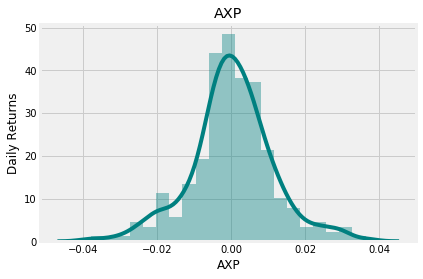

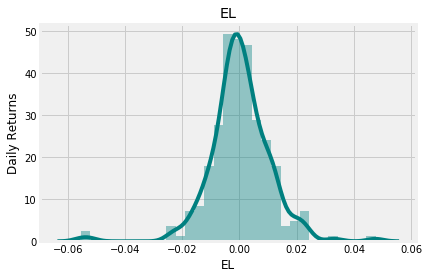

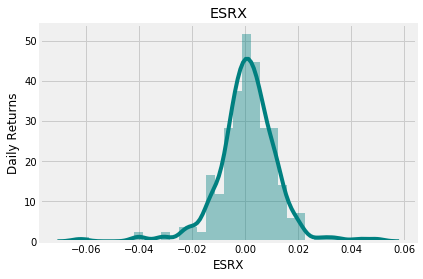

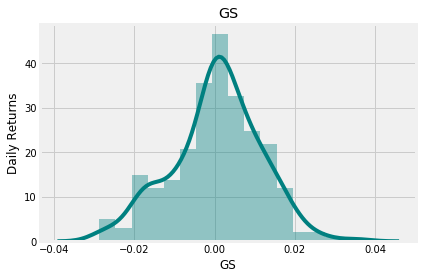

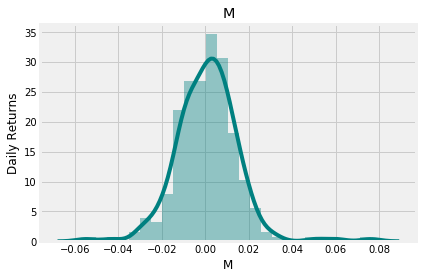

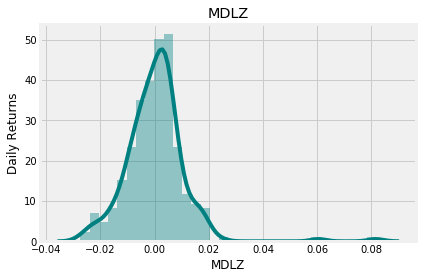

In [137]:
#Distributions of daily returns; Visually daily returns are normally distributed
for i in returns_daily.columns:
    sns.distplot(returns_daily[i], color="teal")
    plt.title(i)
    plt.ylabel("Daily Returns")
    plt.show()

In [138]:
#calculating volatility(standard deviation) to measure also individual performance of stocks
volatility_annual = np.std(returns_daily) * np.sqrt(252)
print(volatility_annual)

AXP     0.177324
EL      0.169186
ESRX    0.185215
GS      0.175190
M       0.227085
MDLZ    0.175833
dtype: float64


In [139]:
#Covariance is another part of the portfolio variance formula mentioned in the introduction
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 252
print(cov_annual)

           AXP        EL      ESRX        GS         M      MDLZ
AXP   0.031570  0.012657  0.014153  0.021285  0.014122  0.014791
EL    0.012657  0.028738  0.011154  0.012227  0.010835  0.008741
ESRX  0.014153  0.011154  0.034442  0.011464  0.011925  0.008066
GS    0.021285  0.012227  0.011464  0.030814  0.010438  0.012323
M     0.014122  0.010835  0.011925  0.010438  0.051774  0.009579
MDLZ  0.014791  0.008741  0.008066  0.012323  0.009579  0.031041


In [140]:
# empty lists to store returns, volatility, weights and sharpe ratio of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []
risk_free_rate = 0.017 #Risk free rate is derived from returns of US Treasury Bills for 2014

In [141]:
# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 200000

In [142]:
#calling functions according to formulae described in the introduction
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) #random call will generate values between [0;1) 
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual) #np.dot gives product of two arrays.
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights))) #(.T) stands for transpose
    sharpe = ((returns-risk_free_rate) / volatility)
    #appending to empty lists created
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [143]:
#Creating dictionary, which will be transferred to pandas DataFrame
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility, 
             "Sharpe Ratio": sharpe_ratio}

In [144]:
#Transferring the dictionary to pandas DataFrame
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]
df = pd.DataFrame(portfolio)

In [145]:
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
df = df[column_order]
df.head(3)

,Returns,Volatility,Sharpe Ratio,EL Weight,M Weight,MDLZ Weight,ESRX Weight,AXP Weight,GS Weight
0,0.134841,0.133374,0.883539,0.239885,0.098555,0.078134,0.189889,0.247806,0.145730
1,0.109301,0.127762,0.722445,0.271614,0.189658,0.133190,0.108594,0.095040,0.201904
2,0.132531,0.135851,0.850424,0.220141,0.029955,0.199798,0.370436,0.091602,0.088068


In [146]:
#Constructing the efficient frontier of highest returns for the given level of risk by getting highest returns
selected_columns = df.iloc[:,:2]              #selecting Retunrs and Volatility columns from the DataFrame 
selected_columns = selected_columns.sort_values(by="Volatility")      #Sorting columns according to Volatility
selected_columns["rets"] = selected_columns.Returns.shift(1)   #'rets' column will shift back returns for coming day
selected_columns.rets = selected_columns.rets.fillna(0)#filling in the first value of rets column of which was obviously null
selected_columns["comp"] = np.where(selected_columns.rets<selected_columns.Returns,"No","Yes") #Comparing columns
selected_columns.head(3)

,Returns,Volatility,rets,comp
91269,0.126221,0.123128,0.000000,No
41032,0.125188,0.123129,0.126221,Yes
41482,0.123973,0.123143,0.125188,Yes


In [147]:
while np.sum(selected_columns.comp=="Yes")>0:
    selected_columns = selected_columns[selected_columns.comp=="No"]
    selected_columns["rets"] = selected_columns.Returns.shift(1)
    selected_columns.rets = selected_columns.rets.fillna(0)
    selected_columns["comp"] = np.where(selected_columns.rets<selected_columns.Returns,"No","Yes")
selected_columns.head(3)

,Returns,Volatility,rets,comp
91269,0.126221,0.123128,0.000000,No
115876,0.129614,0.123204,0.126221,No
23115,0.130288,0.123281,0.129614,No


In [148]:
#Applying scipy interpolation to the frontier to achieve a smooth line
f2=interp1d(selected_columns['Volatility'],y= selected_columns['Returns'], kind='linear')
smooth_x_volatility = np.linspace(selected_columns['Volatility'].min(),
                                  selected_columns['Volatility'].max(),num=20,endpoint=True)

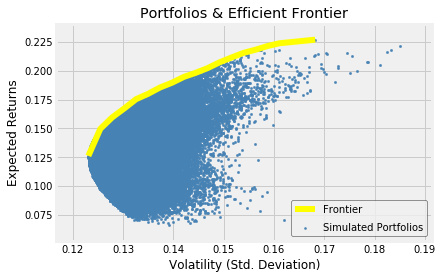

In [149]:
#Scatter plot of imaginary portfolios and the efficient frontier   
plt.scatter(df['Volatility'], df['Returns'], c='steelblue', s=5, label='Simulated Portfolios')
plt.plot(smooth_x_volatility,f2(smooth_x_volatility),color='yellow', linewidth=6.0, label='Frontier') #interpolated frontier
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Portfolios & Efficient Frontier')
plt.legend(loc='lower right', fontsize=10, labelspacing=0.8,edgecolor='black',markerscale=0.9)
plt.gca()

Before continuing, let us explain the actions below. First, the code above generated random portfolios and got the results (portfolios' return, volatility, Sharpe ratios) and weights for the corresponding result. Thereafter, by locating the one with the highest Sharpe ratio portfolio, it will display maximum Sharpe ratio portfolio as a red sign. And does similar steps for minimum volatility portfolio, and displays it as the blue sign on the plot. At the end the output will show the portfolio weights for the maximum Sharpe and for the minimum risk. 

All the randomly generated portfolios will be also plotted with colour map applied to them based on the Sharpe ratio values. The greener, the higher Sharpe ratio.

In [150]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

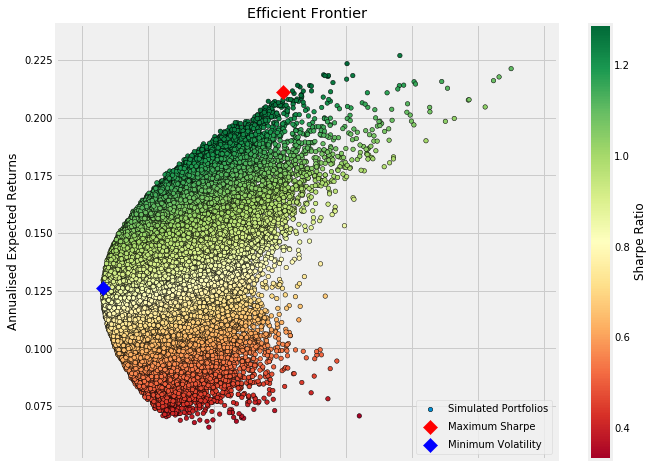

In [151]:
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True, label='Simulated Portfolios')
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', 
            s=100, label = 'Maximum Sharpe')
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', 
            s=100, label='Minimum Volatility')
plt.xlabel('Annualised Volatility (Std. Deviation)')
plt.ylabel('Annualised Expected Returns')
plt.title('Efficient Frontier')
plt.legend(loc='lower right',labelspacing=0.8)

In [152]:
print('\033[1m'+'Project Results'+"\033[0;0m")
print("-"*80)
print("Risk-Averse Portfolio\n")
print(min_variance_port.T)
print("\n")
print("-"*80)
print("\n")
print("The most optimal portfolio as per Sharpe ratio\n")
print(sharpe_portfolio.T)
print("\n")
print( "-"*80)
print("\n")
print ("Individual Stock Returns and Volatility\n")
for i, txt in enumerate(table.columns):
        print (txt,":","Return:",round(returns_annual[i],4),"| Volatility:",
               round(volatility_annual[i],4))

Project Results
--------------------------------------------------------------------------------
Risk-Averse Portfolio

                 91269
Returns       0.126221
Volatility    0.123128
Sharpe Ratio  0.887052
EL Weight     0.003612
M Weight      0.264155
MDLZ Weight   0.203843
ESRX Weight   0.173627
AXP Weight    0.113643
GS Weight     0.241121


--------------------------------------------------------------------------------


The most optimal portfolio as per Sharpe ratio

                 78484
Returns       0.211238
Volatility    0.150524
Sharpe Ratio  1.290420
EL Weight     0.005908
M Weight      0.006615
MDLZ Weight   0.430961
ESRX Weight   0.158222
AXP Weight    0.397606
GS Weight     0.000688


--------------------------------------------------------------------------------


Individual Stock Returns and Volatility

AXP : Return: 0.0662 | Volatility: 0.1773
EL : Return: 0.0592 | Volatility: 0.1692
ESRX : Return: 0.209 | Volatility: 0.1852
GS : Return: 0.1203 | Volatility: 0.

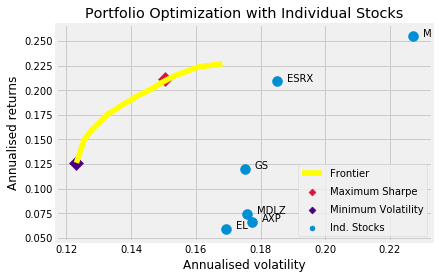

In [153]:
plt.plot(smooth_x_volatility,f2(smooth_x_volatility),color='yellow', 
         linewidth=5.5, linestyle='-', label='Frontier') #interpolated frontier
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], 
            c='crimson', marker='D', s=100, label = 'Maximum Sharpe')
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], 
            c='indigo', marker='D', s=100, label='Minimum Volatility')
plt.scatter(x=volatility_annual,y=returns_annual,marker='o',s=100, label = 'Ind. Stocks')
for i, txt in enumerate(table.columns):
    plt.annotate(txt, (volatility_annual[i],returns_annual[i]),xytext=(10,0), textcoords='offset points')
plt.title('Portfolio Optimization with Individual Stocks')
plt.xlabel('Annualised volatility')
plt.ylabel('Annualised returns')
plt.legend(loc='lower right',labelspacing=0.8, markerscale=0.5)

#### Conclusion

From the above graph it is visible that the efficient frontier provides better investment opportunities for investors. For example, a portfolio only with ESRX stock provides 20.9% return, however with the portfolio optimization investors can achieve the same result with much lower risk. As one can observe, it would be approximately the optimal portfolio marked with the red sign. Accordingly, with the risk level that EL investors are ready to bear, they can achieve much better returns with the diversivified portfolio of those 6 stocks. 

The risk averse portfolio provides approximately the same return as if invested only in GS stock, however for much lower volatility. So, GS investors can benefit by cutting the volatility of their investment by diversifying their position witht the above mentioned weights of stocks.

Yet it is important to underline the limitations of this project. Those limitations essentially come with the assumptions of the Markowitz Portfolio Theory. This project did not consider transaction costs in the stock market, dividend/interest income from stocks and taxes. Additionally, this project assumes that investors are rational and always look for low risk for high returns. Notably, the frontier does not include the M point of the graph. This mainly comes from the fact that simulations only include 200.000 portfolios. Possibly, by continuingly simulating portfolios we can extend the frontier to the point M and even further, however this will cost in speed. 

#### Final Notes

This project is interactive and can be manipulated by users. If user wants to find optimal and risk averse portfolio for the given stocks, he/she can change the tickers in the get_data line to the desired ones, and thus look for conclusions. Similiarly, the timeframe, risk-free rate and some other components are adjustable.